## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import h5py
import os
from pathlib import Path
import sys
import matplotlib.pyplot as plt
import pickle

sys.path.append(
    os.path.abspath(
        os.path.join("__file__", '..', '..')
    )
)

from util.notebook_util import convert_col_name_to_datetime, get_infected_population, remove_zero_population, get_epi_analysis, compute_eff_rep_num
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)
from env.env_setup import rep_num_logger

## Environment Settings

In [2]:
# recovery days
recovery_day = rep_num_logger["recovery_day"]

## File Settings

In [3]:
###################
##### File settings
###################
# data directory
data_dir = os.path.abspath(
    os.path.join(os.path.curdir, '..', 'data')
)

# result directory
res_dir = os.path.abspath(
    os.path.join(os.path.curdir, '..', 'results')
)

# figure directory
fig_dir = os.path.abspath(
    os.path.join(os.path.curdir, '..', 'figures')
)

# clustering result directory
resfile = os.path.join(
    res_dir, 'safegraph_analysis.hdf5'
)

# epidemiology result directory
epi_resfile = os.path.join(
    res_dir, 'epi_analysis.hdf5'
)

#### Load clustering file

In [4]:
# open result file from clustering 
key_base = Path("/clustering")
complevel=7
complib='zlib'
with pd.HDFStore(resfile, complevel=complevel, complib=complib) as store:
    print(f"File {resfile} has {len(store.keys())} entries.")

    ########################################################
    ##### Load clustering and the corresponding csse results
    ########################################################
    key = str(key_base / "cluster_csse_merged")
    df = store[key]
df

File /home/python/shared/results/safegraph_analysis.hdf5 has 832 entries.


,leaves,X,Y,cbg_clusters,population,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,...,2021-04-11 00:00:00,2021-04-12 00:00:00,2021-04-13 00:00:00,2021-04-14 00:00:00,2021-04-15 00:00:00,2021-04-16 00:00:00,2021-04-17 00:00:00,2021-04-18 00:00:00,2021-04-19 00:00:00,2021-04-20 00:00:00
index,,,,,,,,,,,,,,,,,,,,,
0,746,-65.794825,18.277415,"[720531504003, 720531501044, 720531505001, 720...",390728.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,458,-66.083320,18.131576,"[720572702011, 720572703004, 720572705001, 720...",488287.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,873,-66.079340,18.396328,"[720210307001, 720210310113, 720210316223, 720...",1011530.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8,-66.344566,18.363775,"[720399559001, 720399556001, 720399557001, 720...",425126.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,641,-66.582628,18.044742,"[721130724005, 721130727011, 721130727012, 721...",354598.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,911,-158.026269,21.423245,"[150030078092, 150030078102, 150030099044, 150...",459209.0,0,0,0,0,0,...,24243,24291,24330,24365,24422,24537,24585,24678,24730,24754
1020,7,-157.813184,21.329035,"[150090318011, 150099900000, 150030047001, 150...",529047.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1021,392,-156.517054,20.867763,"[150090311032, 150090304042, 150090309034, 150...",161290.0,0,0,0,0,0,...,3971,3986,4004,4021,4045,4100,4136,4142,4152,4165


In [5]:
# convert column name to %m/%d/%y
df = convert_col_name_to_datetime(df)
df.head()

,leaves,X,Y,cbg_clusters,population,01/22/20,01/23/20,01/24/20,01/25/20,01/26/20,...,04/11/21,04/12/21,04/13/21,04/14/21,04/15/21,04/16/21,04/17/21,04/18/21,04/19/21,04/20/21
index,,,,,,,,,,,,,,,,,,,,,
0,746,-65.794825,18.277415,"[720531504003, 720531501044, 720531505001, 720...",390728.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,458,-66.083320,18.131576,"[720572702011, 720572703004, 720572705001, 720...",488287.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,873,-66.079340,18.396328,"[720210307001, 720210310113, 720210316223, 720...",1011530.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8,-66.344566,18.363775,"[720399559001, 720399556001, 720399557001, 720...",425126.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,641,-66.582628,18.044742,"[721130724005, 721130727011, 721130727012, 721...",354598.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Compute Epidemiology information

In [6]:
# construct result dataframe
df_clusters = pd.DataFrame(df[["leaves", "X", "Y", "population"]])
df_clusters

,leaves,X,Y,population
index,,,,
0,746,-65.794825,18.277415,390728.0
1,458,-66.083320,18.131576,488287.0
2,873,-66.079340,18.396328,1011530.0
3,8,-66.344566,18.363775,425126.0
4,641,-66.582628,18.044742,354598.0
...,...,...,...,...
1019,911,-158.026269,21.423245,459209.0
1020,7,-157.813184,21.329035,529047.0
1021,392,-156.517054,20.867763,161290.0


In [7]:
print(f"Do we have any cluster has 0 population? if so print it \n {df_clusters[df_clusters['population'] == 0]}")

Do we have any cluster has 0 population? if so print it 
        leaves           X          Y  population
index                                           
1017      236 -175.828603  27.854941         0.0


#### So here we exclude the community with 0 population since it may mess up with our analysis

In [8]:
df_clusters = remove_zero_population(df_clusters)
df_clusters

,leaves,X,Y,population
0,746,-65.794825,18.277415,390728.0
1,458,-66.083320,18.131576,488287.0
2,873,-66.079340,18.396328,1011530.0
3,8,-66.344566,18.363775,425126.0
4,641,-66.582628,18.044742,354598.0
...,...,...,...,...
1018,911,-158.026269,21.423245,459209.0
1019,7,-157.813184,21.329035,529047.0
1020,392,-156.517054,20.867763,161290.0
1021,808,-155.865732,19.692965,88670.0


#### Continue our analysis

In [9]:
# Get accumulative confirmed cases
df_confirmed_case = df.iloc[:, 5:]

# Drop the community number 1017
df_confirmed_case = df_confirmed_case.drop(1017).reset_index(drop=True)
df_confirmed_case

,01/22/20,01/23/20,01/24/20,01/25/20,01/26/20,01/27/20,01/28/20,01/29/20,01/30/20,01/31/20,...,04/11/21,04/12/21,04/13/21,04/14/21,04/15/21,04/16/21,04/17/21,04/18/21,04/19/21,04/20/21
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,0,0,0,0,0,0,0,0,0,0,...,24243,24291,24330,24365,24422,24537,24585,24678,24730,24754
1019,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1020,0,0,0,0,0,0,0,0,0,0,...,3971,3986,4004,4021,4045,4100,4136,4142,4152,4165
1021,0,0,0,0,0,0,0,0,0,0,...,2629,2634,2639,2654,2668,2671,2682,2692,2694,2695


In [10]:
df_sus_population, df_sus_portion, df_inf_population, df_inf_portion = get_epi_analysis(df_clusters = df_clusters, 
                                                                                        df_confirmed_case = df_confirmed_case,
                                                                                        recovery_day = recovery_day)

0       7.0
1       7.0
2       7.0
3       7.0
4       7.0
       ... 
1018    7.0
1019    7.0
1020    7.0
1021    7.0
1022    7.0
Length: 1023, dtype: float64
0       7.0
1       7.0
2       7.0
3       7.0
4       7.0
       ... 
1018    7.0
1019    7.0
1020    7.0
1021    7.0
1022    7.0
Length: 1023, dtype: float64
0       7.0
1       7.0
2       7.0
3       7.0
4       7.0
       ... 
1018    7.0
1019    7.0
1020    7.0
1021    7.0
1022    7.0
Length: 1023, dtype: float64
0       7.0
1       7.0
2       7.0
3       7.0
4       7.0
       ... 
1018    7.0
1019    7.0
1020    7.0
1021    7.0
1022    7.0
Length: 1023, dtype: float64
0       7.0
1       7.0
2       7.0
3       7.0
4       7.0
       ... 
1018    7.0
1019    7.0
1020    7.0
1021    7.0
1022    7.0
Length: 1023, dtype: float64
0       7.0
1       7.0
2       7.0
3       7.0
4       7.0
       ... 
1018    7.0
1019    7.0
1020    7.0
1021    7.0
1022    7.0
Length: 1023, dtype: float64
0       7.0
1       7.0
2       7.

#### Check suspected population, and its corresponding porportion

Let's do a little exploration: find the community that has the less suspected portion and check it variation over these days.

In [11]:
final_day = df_sus_portion["04/20/21"]
sus_portion_min = final_day[final_day != 0].min()
final_day[final_day == sus_portion_min].index

Index([951], dtype='int64')

<Axes: >

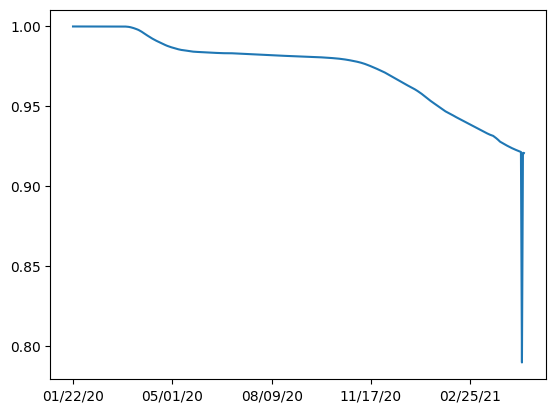

In [12]:
# The 951th community has the smallest suspected portion
df_sus_portion.loc[116].plot()

#### Check infected population, and its corresponding porportion

Similarly, let's check the variation of infected portion of the 951th cluster.

<Axes: >

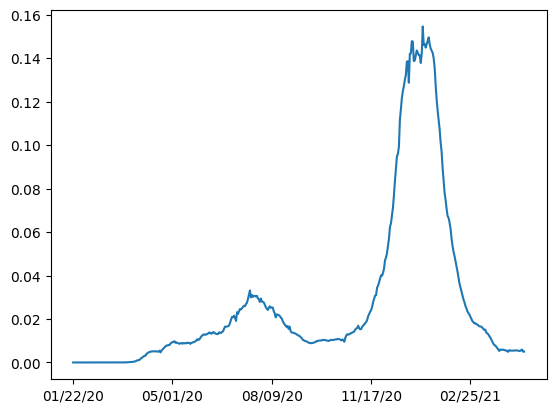

In [13]:
df_inf_portion.loc[951].plot()

In [14]:
df_inf_portion

,01/22/20,01/23/20,01/24/20,01/25/20,01/26/20,01/27/20,01/28/20,01/29/20,01/30/20,01/31/20,...,04/11/21,04/12/21,04/13/21,04/14/21,04/15/21,04/16/21,04/17/21,04/18/21,04/19/21,04/20/21
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.002001,0.001993,0.001979,0.001964,0.001934,0.001895,0.001842,0.001934,0.001934,0.001923
1019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.002753,0.002623,0.002666,0.002579,0.002542,0.002288,0.002362,0.002238,0.002158,0.002108
1021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001624,0.001568,0.001556,0.001545,0.001613,0.001432,0.001455,0.001398,0.001263,0.001252


## Compute Distributed Reproduction Number

In [15]:
######################################################
##### We first read the infected matrix from xlsx file
######################################################
inf_mat_file = os.path.join(
    data_dir, 'inf_matrix_flux_model.xlsx'
)
inf_mat = pd.read_excel(inf_mat_file, 'infectivity_matrix_mean')

# Remove unuseful rows and columns
inf_mat = inf_mat.iloc[1:,2:]

# Convert to numpy matrix
inf_matrix = inf_mat.to_numpy()

#### Remove the number 1017 community since it has 0 population

In [16]:
print(f"Before removing the 1017th community, we have matrix shape: {inf_matrix.shape}")

Before removing the 1017th community, we have matrix shape: (1024, 1024)


In [17]:
inf_matrix = np.delete(inf_matrix, (1017), axis=0)
inf_matrix = np.delete(inf_matrix, (1017), axis=1)
print(f"After removing the 1017th community, we have matrix shape: {inf_matrix.shape}")

After removing the 1017th community, we have matrix shape: (1023, 1023)


#### Back to our analysis

In [18]:
###################################################
##### Next we compute the basic reproduction number
###################################################
# recovery matrix
rec_mat = np.diag([recovery_day for i in range(inf_matrix.shape[0])])

# basic reproduction number
basic_rep_num_mat = np.matmul(rec_mat, inf_matrix)

#### Data sanity check

In [19]:
# Check if the basic reproduction number matrix has nan values
print(f"If any value is nan in the basic reproduction number matrix, print it: {basic_rep_num_mat[np.isnan(basic_rep_num_mat)]}")

##############################################################################
##### Now convert the suspected and infected portion dataframe to numpy matrix
##############################################################################
sus_portion = df_sus_portion.to_numpy()
inf_portion = df_inf_portion.to_numpy()

# any nan in the df_sus_portion dataframe?
print(f"nan value if df_sus_portion: {df_sus_portion.isnull().values.any()}")
print(f"nan value if df_sus_portion: {df_sus_portion[df_sus_portion.isna().any(axis=1)]}")

# any nan in the df_inf_portion dataframe?
print(f"nan value if df_inf_portion: {df_inf_portion.isnull().values.any()}")
print(f"nan value if df_inf_portion: {df_inf_portion[df_inf_portion.isna().any(axis=1)]}")

# Check if they have nan values
print(f"If any value is nan in the suspect portion matrix, print it: {sus_portion[np.isnan(sus_portion)]}")
print(f"If any value is nan in the infected portion matrix, print it: {inf_portion[np.isnan(inf_portion)]}")
print(f"The shape of suspect portion matrix, print it: {sus_portion[np.isnan(sus_portion)]}")
print(f"The shape of infected portion matrix, print it: {inf_portion[np.isnan(inf_portion)]}")

If any value is nan in the basic reproduction number matrix, print it: []
nan value if df_sus_portion: False
nan value if df_sus_portion: Empty DataFrame
Columns: [01/22/20, 01/23/20, 01/24/20, 01/25/20, 01/26/20, 01/27/20, 01/28/20, 01/29/20, 01/30/20, 01/31/20, 02/01/20, 02/02/20, 02/03/20, 02/04/20, 02/05/20, 02/06/20, 02/07/20, 02/08/20, 02/09/20, 02/10/20, 02/11/20, 02/12/20, 02/13/20, 02/14/20, 02/15/20, 02/16/20, 02/17/20, 02/18/20, 02/19/20, 02/20/20, 02/21/20, 02/22/20, 02/23/20, 02/24/20, 02/25/20, 02/26/20, 02/27/20, 02/28/20, 02/29/20, 03/01/20, 03/02/20, 03/03/20, 03/04/20, 03/05/20, 03/06/20, 03/07/20, 03/08/20, 03/09/20, 03/10/20, 03/11/20, 03/12/20, 03/13/20, 03/14/20, 03/15/20, 03/16/20, 03/17/20, 03/18/20, 03/19/20, 03/20/20, 03/21/20, 03/22/20, 03/23/20, 03/24/20, 03/25/20, 03/26/20, 03/27/20, 03/28/20, 03/29/20, 03/30/20, 03/31/20, 04/01/20, 04/02/20, 04/03/20, 04/04/20, 04/05/20, 04/06/20, 04/07/20, 04/08/20, 04/09/20, 04/10/20, 04/11/20, 04/12/20, 04/13/20, 04/14/

#### Continue analysis: Let's have a plot for a effective reproduction number!!!

In [20]:
df_clusters.sort_values("population")

,leaves,X,Y,population
988,835,-139.403325,59.654296,646.0
1011,805,-155.622923,62.266873,882.0
1014,351,-163.632676,54.923017,906.0
1016,346,-175.298792,52.005047,1004.0
996,12,-144.614106,66.383213,1217.0
...,...,...,...,...
114,802,-73.796959,40.713062,2121661.0
117,309,-73.873988,40.882954,2261356.0
383,566,-87.740978,41.944082,2325151.0
115,188,-73.963981,40.645997,2680879.0


In [21]:
# compute the effective reproduction number matrix for each date
eff_rep_num_list = compute_eff_rep_num(sus_portion, inf_portion, basic_rep_num_mat, df_clusters["population"].to_numpy())

In [22]:
eff_rep_num_list[100].eff_rep_num_mat

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.83057586e-04, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.90972804e-03, 4.01172106e-02, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.39899436e+01, 3.11608986e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.05549267e-02, 1.39885418e+01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.33651335e+00, 2.00000000e+01, 0.00000000e+00]])

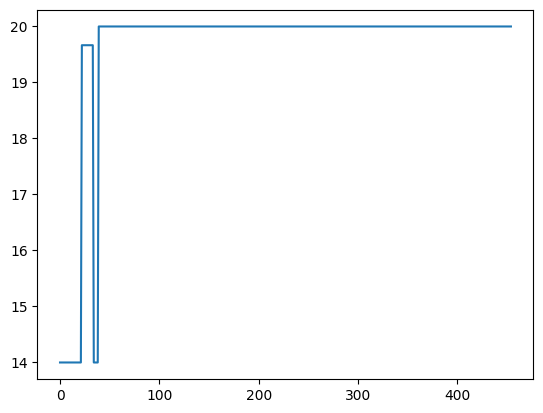

In [23]:
# loop through eff_rep_num_list
max_num = []
for i in range(len(eff_rep_num_list)):
    max_num.append(np.max(eff_rep_num_list[i].eff_rep_num_mat))

plt.plot(max_num)

## Save to file

In [24]:
key_base = Path("/first_clustering")
with pd.HDFStore(epi_resfile, complevel=complevel, complib=complib) as store:
    ############################
    ##### basic information data
    ############################
    # cluster information
    key = str(key_base / "basic" / "cluster")
    store[key] = df_clusters

    # confirmed cases information
    key = str(key_base / "basic" / "confirmed_cases")
    store[key] = df_confirmed_case

    #############################
    ##### population related data
    #############################
    # suspected population
    key = str(key_base / "population" / "suspected_population")
    store[key] = df_sus_population

    # suspected portion
    key = str(key_base / "population" / "suspected_portion")
    store[key] = df_sus_portion

    # infected population
    key = str(key_base / "population" / "infected_population")
    store[key] = df_inf_population

    # infected portion
    key = str(key_base / "population" / "infected_portion")
    store[key] = df_inf_portion


#################################
##### Reproduction number related
#################################
# basic reproduction number matrix
rep_num_logger["basic_reproduction_number_matrix"] = basic_rep_num_mat

# effective reproduction number matrix
rep_num_logger["effective_reproduction_number_matrix"] = eff_rep_num_list

# save file
save_folder_str = os.path.join(os.path.abspath(os.path.join("__file__", '..', '..','results')))
save_file_name = rep_num_logger['exp_name'] + '.pkl'
save_str = os.path.abspath(os.path.join(save_folder_str, 
                                            save_file_name))   
with open(save_str, 'wb') as f:
    pickle.dump(rep_num_logger, f, protocol=pickle.HIGHEST_PROTOCOL)